# Уравнение переноса

### Постановка задачи
Рассматривается уравнение переноса, описывающее изменение скалярной величины в пространстве и времени.  
Пусть дана функция начального профиля $u_0(x)$ и скорость переноса $C$.  **Задача** - определить положение системы в определенный момент времени. В нашей программе проанализируем систему на интервале времени $t \in [0, T].$

### Численное решение
$$
\begin{cases}
\frac{\partial{u(x, t)}}{\partial t} + C \frac{\partial u(x,t)}{\partial x} = 0, \quad x \in R, \quad t > 0, \\
u(x, 0) = u_0(x), \quad x > 0,\\
u(0, t) = v_0(t), \quad t > 0,\\
\end{cases}
$$



Построим численное решение на двумерной равномерной сетке $n m$:
$$x_i = L + i h, \\
t_k = k \tau,$$
где $h = \frac{R-L}{n}$ и $\tau = \frac{T}{m}$ $-$ шаги по сетке.

Предлагается использовать схему бегущего счета для решения уравнения. Для этого необходимо представить исходное дифференциальное уравнение в виде разностной схемы:
$$
\frac{y_i^{k+1}-y_i^{k}}{\tau} + C \frac{y_i^{k}-y_{i-1}^k}{h} = 0.
$$
Это уравнение легко разрешается относительно неизвестной, в нашем случае, $y_i^{k+1}.$   Произведя вычисления в цикле, найдем все значения профиля в любой точке пространства и любой момент времени в области определения функции.


Величины $C, T, R, L$ определяются условием задачи, а разбиение сетки $-$ самим численным решением. Для оценки результата численного решения, заранее вычисляем аналитическое решение.

### Устойчивость
Условие устойчивости (условие Куранта): $$\tau < \frac{h}{2C}$$.

### Погрешность $$O(\tau + h)$$




In [2]:
%matplotlib notebook

Введите целые числа:
n = 100
m = 100


<IPython.core.display.Javascript object>


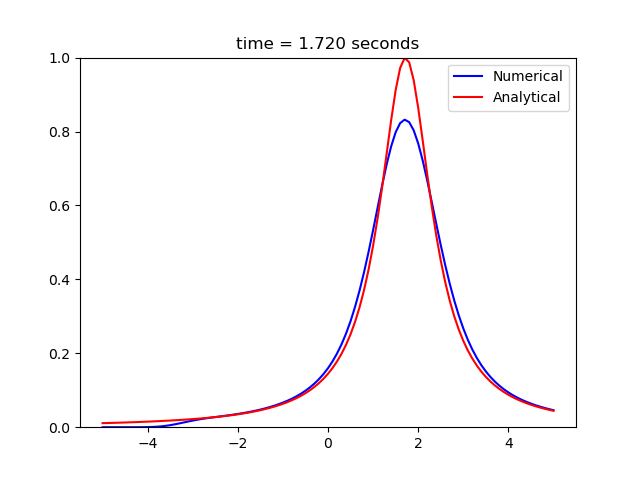

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Параметры задачи
def u0(x):
    return 1.0 / (1 + 2 * x * x)

C = 1.0
T = 2.0
L, R = -5.0, 5.0


# Параметры метода
print('Введите целые числа:')
print('n = ', end='')
n = int(input())
print('m = ', end='')
m = int(input())

h = (R-L) / n
tau = T / m


# Сетки
x = np.linspace(L, R, n+1)
t = np.linspace(0.0, T, m+1)
y = np.zeros((m+1, n+1))


# Метод
d = C * tau / h
y[0] = np.vectorize(u0)(x)
for k in range(m):
    for i in range(1, n+1):
        y[k+1][i] = y[k][i] - d * (y[k][i] - y[k][i-1])



# Точное решение
def solution(x, t):
    return u0(x - C*t)

vsolution = np.vectorize(solution, excluded='t')
u = np.zeros((m+1, n+1))
for k in range(m):
    u[k] = vsolution(x, tau*k)


def animate(k):
    plt.clf()
    plt.ylim(0, 1)
    plt.title(f"time = {tau*k:0.3f} seconds")
    plt.plot(x, y[k], 'b-', label='Numerical')
    plt.plot(x, u[k], 'r-', label='Analytical')
    plt.legend()


ani = animation.FuncAnimation(plt.figure(0), animate, frames=y.shape[0], interval=100)
#ani.save('transfer.gif', 'animation.writer')
plt.show()


# Уравнение теплопроводности

### Постановка задачи
Также как и в предыдущем примере, дана функция начального профиля $u_0(x)$ и коэффициент теплопроводности $\mu$, и требуется найти профиль в произволный момент времени.

### Численное решение
$$
\begin{cases}
\frac{\partial{u(x, t)}}{\partial t} + \mu \frac{\partial^2 u(x,t)}{\partial x^2} = 0, \quad x \in R, \quad t > 0, \\
u(x, 0) = u_0(x), \quad x > R.\\
\end{cases}
$$

Построим численное решение на двумерной равномерной сетке $n * m$:
$$x_i = L + i h, \\
t_k = k \tau,$$
где $h = \frac{R-L}{n}$ и $\tau = \frac{T}{m}$ $-$ шаги по сетке.


Теперь в качестве аппроксимации дифференциального уравнения берем нижеприведенную разностную схему:
$$
\frac{y_i^{k+1} - y_i^k}{\tau} - \mu \frac{y_{i+1}^k - 2y_i^k + y_{i-1}^k}{h}, \quad i = 1,..., n-1.
$$

Разрешая относительно $y_i^{k+1}$ и вычисляя эту величину во всех соответствующих узлах, найдем профиль волны в произвольной точке пространства и момент времени.

### Устойчивость
Условие устойчивости: $$\tau < \frac{h^2}{2\mu}$$.

### Погрешность $$O(\tau + h^2)$$


Введите целые числа:
n = 100
m = 100


<IPython.core.display.Javascript object>


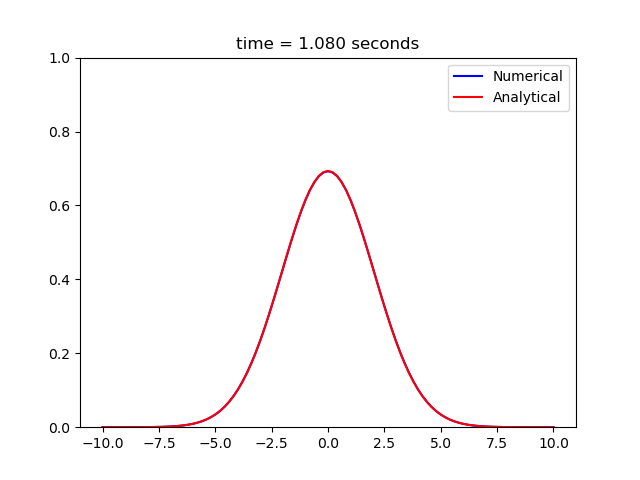

MovieWriter animation.writer unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


# Параметры задачи
def u0(x):
    return np.exp(-x*x/4)

mu = 1.0
T = 2.0
L, R = -10.0, 10.0


# Параметры метода
print('Введите целые числа:')
print('n = ', end='')
n = int(input())
print('m = ', end='')
m = int(input())

h = (R - L) / n
tau = T / m


# Сетки
x = np.linspace(L, R, n+1)
t = np.linspace(0.0, T, m+1)
y = np.zeros((m+1, n+1))


# Метод
d = mu * tau / (h * h)
y[0] = np.vectorize(u0)(x)
for k in range(m):
    for i in range(1, n):
        y[k+1][i] = y[k][i] + d * (y[k][i-1] - 2 * y[k][i] + y[k][i+1])


# Точное решение
def solution(x, t):
    return 1 / np.sqrt(t + 1) * np.exp(-x * x / (4 * (t + 1)))


vsolution = np.vectorize(solution, excluded=['t'])
u = np.zeros((m+1, n+1))
for k in range(m):
    u[k] = vsolution(x, tau*k)



def animate(k):
    plt.clf()
    plt.ylim(0, 1)
    plt.title(f"time = {tau*k:0.3f} seconds")
    plt.plot(x, y[k], 'b-', label='Numerical')
    plt.plot(x, u[k], 'r-', label='Analytical')
    plt.legend()


ani = animation.FuncAnimation(plt.figure(0), animate, frames=y.shape[0], interval=100)
#ani.save('thermal.gif', 'animation.writer')
plt.show()
